# Customer Retention & Churn Analysis

## Task 2 – Data Science & Analytics Internship (Future Interns)

### Objective
The objective of this analysis is to identify customer churn patterns,
understand key factors influencing churn, analyze retention behavior,
and provide actionable strategies to improve customer retention
in a subscription-based business.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Load Telco Churn dataset
df = pd.read_csv("telco_churn.csv")

# Preview dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape


(7043, 21)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Dataset Understanding

The dataset contains customer-level information for a subscription-based
telecommunications service. It includes customer demographics, service usage,
billing details, and churn status.

The target variable `Churn` indicates whether a customer has discontinued
the service, making this dataset suitable for churn and retention analysis.


In [6]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [8]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [10]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.drop(columns=['customerID'], inplace=True)


In [12]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [13]:
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

## Data Cleaning Summary

- Converted `TotalCharges` to numeric format and handled missing values.
- Removed customer identifier column as it does not contribute to analysis.
- Encoded the target variable `Churn` into binary format for analysis.
- Ensured dataset contains no missing values.


In [14]:
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

churn_counts, churn_percentage


(Churn
 0    5174
 1    1869
 Name: count, dtype: int64,
 Churn
 0    73.463013
 1    26.536987
 Name: proportion, dtype: float64)

## Churn Distribution Insights

- Approximately **26.5%** of customers have churned, indicating a significant retention challenge.
- While the majority of customers remain active, the churn rate is high enough to impact long-term revenue.
- This highlights the importance of identifying key drivers of churn and implementing targeted retention strategies.


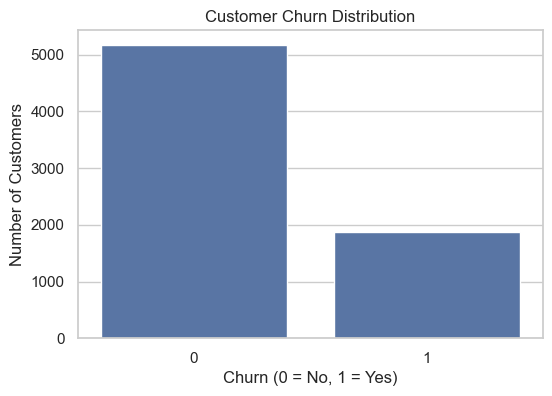

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


## Churn Visualization Insight

- The visualization clearly shows that non-churned customers dominate the dataset.
- However, a sizable churned segment exists, reinforcing the need for churn prediction and prevention strategies.


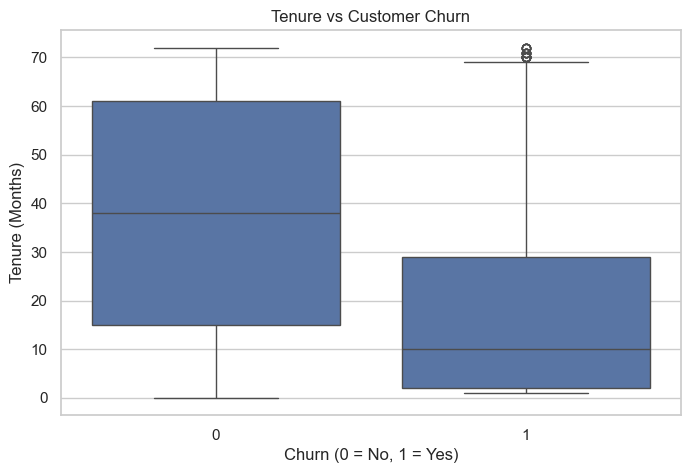

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Customer Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (Months)")
plt.show()


## Tenure vs Churn Insights

- Customers who churn generally have a much lower tenure compared to retained customers.
- Long-term customers show stronger loyalty and lower churn probability.
- This suggests that improving early-stage customer experience is critical for retention.


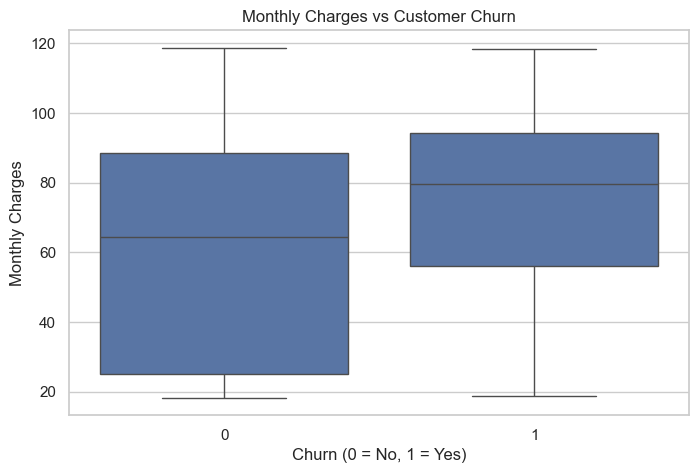

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Customer Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()


## Monthly Charges vs Churn Insights

- Customers who churn tend to have higher monthly charges compared to retained customers.
- Higher pricing may contribute to dissatisfaction and increased churn risk.
- This highlights the importance of competitive pricing and value-based plans for retention.


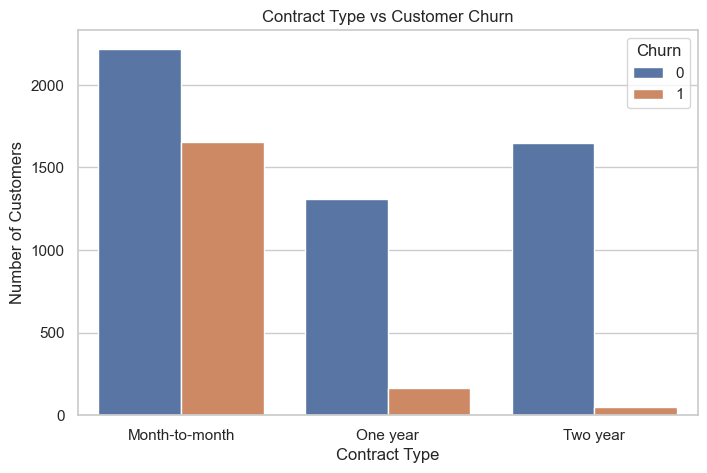

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Customer Churn")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()


## Contract Type vs Churn Insights

- Month-to-month customers exhibit the highest churn rate.
- Customers on one-year and two-year contracts show significantly lower churn.
- Longer contracts increase customer commitment and reduce churn risk.
- Encouraging long-term contracts can substantially improve retention.


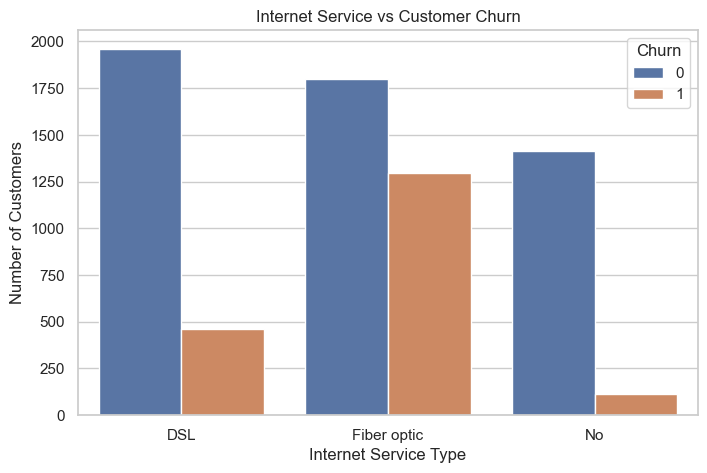

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service vs Customer Churn")
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()


## Internet Service vs Churn Insights

- Customers using Fiber Optic services show a noticeably higher churn rate.
- DSL customers are relatively more stable compared to Fiber Optic users.
- Customers without internet service exhibit the lowest churn.
- High-cost or performance-related issues in Fiber Optic services may contribute to dissatisfaction and churn.


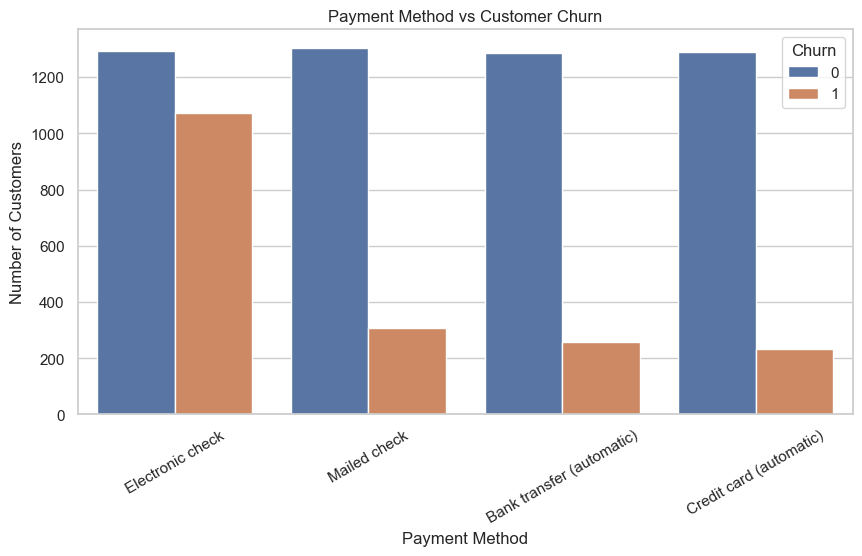

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Payment Method vs Customer Churn")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=30)
plt.legend(title="Churn")
plt.show()


## Payment Method vs Churn Insights

- Customers using Electronic Check show the highest churn rate.
- Customers paying via automatic payment methods (credit card or bank transfer) have significantly lower churn.
- Manual payment methods may be associated with lower engagement and higher churn risk.
- Encouraging auto-payment enrollment could improve customer retention.


## Final Business Insights & Recommendations

- Customers with month-to-month contracts, higher monthly charges, and electronic check payments show the highest churn risk.
- Short customer tenure is a strong indicator of churn, emphasizing the importance of early engagement.
- Long-term contracts and bundled services significantly improve customer retention.
- Customers enrolled in automatic payment methods are more likely to stay longer.

### Business Recommendations
- Offer incentives to convert month-to-month customers into long-term contracts.
- Promote auto-payment options with discounts or rewards.
- Improve onboarding and customer experience during the first 6 months.
- Introduce value-based bundles to reduce perceived pricing pressure.
